In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

import ncar_jobqueue
from dask.distributed import Client

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import pandas as pd

style.use('default')
import matplotlib.path as mpath

### Get satellite chlorophyll

In [2]:
file = '/glade/work/kristenk/satellite_data/Chl_annual_combined/MODIS_annual_chlorophyll_2002to2018.nc'    
ds_sat=xr.open_dataset(file).compute()
ds_sat['time']=np.arange(2002,2019,1)

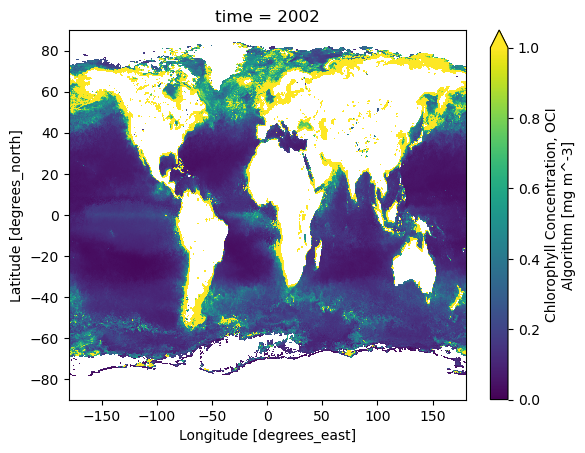

In [3]:
ds_sat.chlor_a.isel(time=0).plot(vmin=0,vmax=1);

### calculate mean, st dev, stdev/mean

In [5]:
st_dev_satchl = ds_sat.chlor_a.std(dim='time')
mean_satchl = ds_sat.chlor_a.mean(dim='time')
norm_stdev_satchl = st_dev_satchl/mean_satchl

### Get SAM indices

In [6]:
csv_file = '/glade/work/kristenk/SAM_index/SAM_indices.csv'
sam_indices = pd.read_csv(csv_file, header=None)
sam_indices.columns = ['year', 'ANN', 'AUT' , 'WIN', 'SPR', 'SUM']
sam_indices

,year,ANN,AUT,WIN,SPR,SUM
0,1957,-4.24,-2.52,-0.68,-3.55,-2.52
1,1958,-1.27,-2.97,-0.92,1.42,1.12
2,1959,0.47,-0.94,-1.22,3.20,0.31
3,1960,1.52,0.74,0.32,1.00,-0.08
4,1961,1.22,0.48,0.93,0.85,2.19
...,...,...,...,...,...,...
58,2015,4.13,1.43,3.19,1.75,2.19
59,2016,1.67,1.64,1.49,-0.31,-1.75
60,2017,1.67,1.34,1.15,1.42,2.33
61,2018,1.96,-0.81,-0.76,3.92,1.43


### Annual SAM correlations

In [7]:
ann_sam = sam_indices.ANN.values
time_sam = sam_indices.year.values

na = np.newaxis
da_sam = ann_sam[:,na,na]
da_sam = xr.DataArray(da_sam, dims=('time','y','x'))

#just get the overlapping timeperiod of MODIS, 2002 to 2018
da_sam = da_sam.isel(time=slice(45,62))

In [8]:
chlsat_sam_ann_corr = xr.corr(ds_sat.chlor_a, da_sam, dim='time')
chlsat_sam_ann_corr = chlsat_sam_ann_corr.squeeze()

### Summer SAM

In [9]:
sum_sam = sam_indices.SUM.values
time_sam = sam_indices.year.values

na = np.newaxis
da_sam_sum = sum_sam[:,na,na]
da_sam_sum = xr.DataArray(da_sam_sum, dims=('time','y','x'))

#just get the overlapping timeperiod of MODIS, 2002 to 2018
da_sam_sum = da_sam_sum.isel(time=slice(45,62))

In [10]:
chlsat_sam_sum_corr = xr.corr(ds_sat.chlor_a, da_sam_sum, dim='time')
chlsat_sam_sum_corr = chlsat_sam_sum_corr.squeeze()

### Winter SAM

In [11]:
win_sam = sam_indices.WIN.values
time_sam = sam_indices.year.values

na = np.newaxis
da_sam_win = win_sam[:,na,na]
da_sam_win = xr.DataArray(da_sam_win, dims=('time','y','x'))

#just get the overlapping timeperiod of MODIS, 2002 to 2018
da_sam_win = da_sam_win.isel(time=slice(45,62))

In [12]:
chlsat_sam_win_corr = xr.corr(ds_sat.chlor_a, da_sam_win, dim='time')
chlsat_sam_win_corr = chlsat_sam_win_corr.squeeze()

In [13]:
ds_sat

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 2160, lon: 4320, rgb: 3, time: 17)
Coordinates:
  * lon      (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat      (lat) float32 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * time     (time) int64 2002 2003 2004 2005 2006 ... 2014 2015 2016 2017 2018
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    chlor_a  (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    palette  (time, rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 0 0 0 0 0
Attributes:
    product_name:                      A20020012002365.L3m_YR_CHL_chlor_a_9km.nc
    instrument:                        MODIS
    title:                             HMODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    6-month
    processing_version:                2018.0
    date_created:                      2018-01-09T01:27:43.000Z
    history:                           l3mapgen par=A20020012002365.L3m_YR_CH...
    l2_flag_names:                     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,...
    time_coverage_start:               2002-07-04T00:40:05.000Z
    time_coverage_end:                 2003-01-01T02:49:59.000Z
    start_orbit_number:                885
    end_orbit_number:                  3522
    map_projection:                    Equidistant Cylindrical
    latitude_units:                    degrees_north
    longitude_units:                   degrees_east
    northernmost_latitude:             90.0
    southernmost_latitude:             -90.0
    westernmost_longitude:             -180.0
    easternmost_longitude:             180.0
    geospatial_lat_max:                90.0
    geospatial_lat_min:                -90.0
    geospatial_lon_max:                180.0
    geospatial_lon_min:                -180.0
    grid_mapping_name:                 latitude_longitude
    latitude_step:                     0.083333336
    longitude_step:                    0.083333336
    sw_point_latitude:                 -89.958336
    sw_point_longitude:                -179.95833
    geospatial_lon_resolution:         9.276625
    geospatial_lat_resolution:         9.276625
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    spatialResolution:                 9.28 km
    number_of_lines:                   2160
    number_of_columns:                 4320
    measure:                           Mean
    suggested_image_scaling_minimum:   0.01
    suggested_image_scaling_maximum:   20.0
    suggested_image_scaling_type:      LOG
    suggested_image_scaling_applied:   No
    _lastModified:                     2018-01-09T01:27:43.000Z
    Conventions:                       CF-1.6 ACDD-1.3
    institution:                       NASA Goddard Space Flight Center, Ocea...
    standard_name_vocabulary:          CF Standard Name Table v36
    naming_authority:                  gov.nasa.gsfc.sci.oceandata
    id:                                A20020012002365.L3b_YR_CHL.nc/L3/A2002...
    license:                           http://science.nasa.gov/earth-science/...
    creator_name:                      NASA/GSFC/OBPG
    publisher_name:                    NASA/GSFC/OBPG
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    publisher_email:                   data@oceancolor.gsfc.nasa.gov
    creator_url:                       http://oceandata.sci.gsfc.nasa.gov
    publisher_url:                     http://oceandata.sci.gsfc.nasa.gov
    processing_level:                  L3 Mapped
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/AQUA/MODIS/L3M/CHL/2018
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:        

### Southern Ocean plots

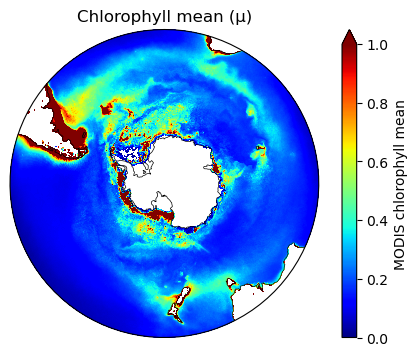

In [14]:
fig = plt.figure(figsize=(6,4))


#----------PLOT MEAN STATE---------------------------------------------------
contour_specs1 = {'levels': np.arange(0,0.8,0.08)}

ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('Chlorophyll mean (µ)')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,mean_satchl, vmin=0, vmax=1, 
                 cmap='jet',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='MODIS chlorophyll mean')

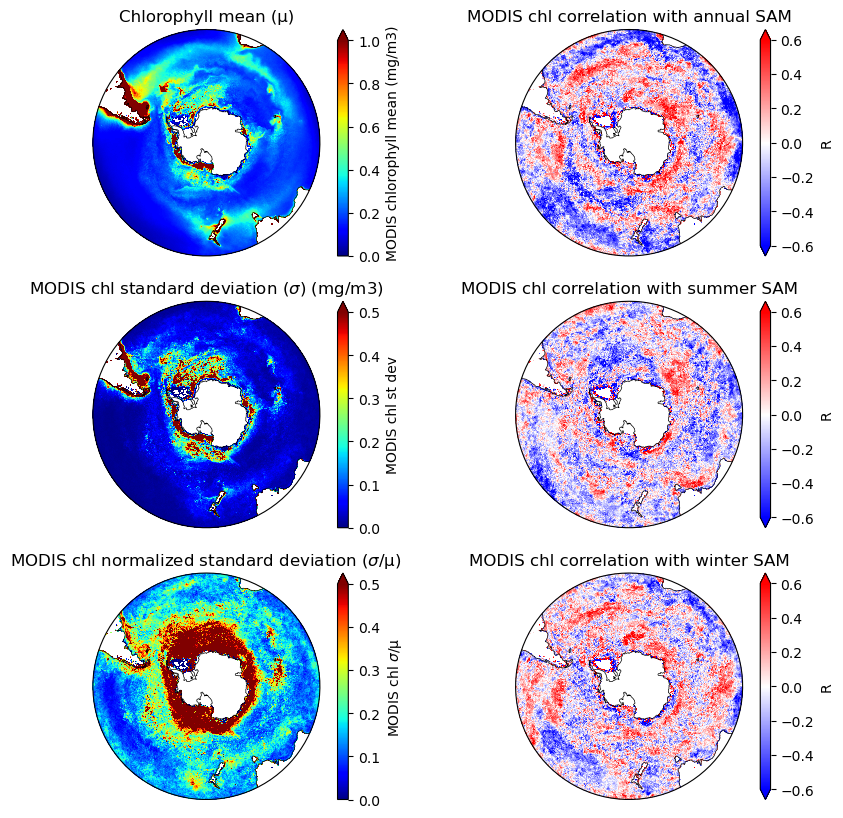

In [15]:
fig = plt.figure(figsize=(10,10))


#----------PLOT MEAN STATE---------------------------------------------------
ax = fig.add_subplot(3,2,1, projection=ccrs.SouthPolarStereo())
ax.set_title('Chlorophyll mean (µ)')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,mean_satchl, vmin=0, vmax=1, 
                 cmap='jet',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='MODIS chlorophyll mean (mg/m3)')

#----------PLOT ST DEV ---------------------------------------------------
ax = fig.add_subplot(3,2,3, projection=ccrs.SouthPolarStereo())
ax.set_title('MODIS chl standard deviation (${\sigma}$) (mg/m3)')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,st_dev_satchl, vmin=0, vmax=0.5, 
                 cmap='jet',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='MODIS chl st dev')

#----------PLOT MEAN/ST DEV ---------------------------------------------------
ax = fig.add_subplot(3,2,5, projection=ccrs.SouthPolarStereo())
ax.set_title('MODIS chl normalized standard deviation (${\sigma}$/µ) ')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,norm_stdev_satchl, vmin=0, vmax=0.5, 
                 cmap='jet',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='MODIS chl ${\sigma}$/µ')

#----------PLOT SAM annual correlation --------------------------------------------------
ax = fig.add_subplot(3,2,2, projection=ccrs.SouthPolarStereo())
ax.set_title('MODIS chl correlation with annual SAM')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,chlsat_sam_ann_corr, 
                 vmin=-0.6, vmax=0.6, 
                 cmap='bwr',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')

#----------PLOT SAM summer correlation ---------------------------------------------------

ax = fig.add_subplot(3,2,4, projection=ccrs.SouthPolarStereo())
ax.set_title('MODIS chl correlation with summer SAM')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,chlsat_sam_sum_corr,
                 vmin=-0.6, vmax=0.6, 
                 cmap='bwr',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')

#----------PLOT SAM winter correlation ---------------------------------------------------
ax = fig.add_subplot(3,2,6, projection=ccrs.SouthPolarStereo())
ax.set_title('MODIS chl correlation with winter SAM')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,chlsat_sam_win_corr,
                 vmin=-0.6, vmax=0.6, 
                 cmap='bwr',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')

### Ok, now get CESM chlorophyll and see how that looks

In [16]:
case = 'g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.zoo4longlived2'
path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/year_1'
variables = ['IFRAC','PD','diatChl','spChl','diazChl','coccoChl']
coords = {'x':'TLONG','y':'TLAT'}
keepthese = ['z_t','time_bound','TAREA','REGION_MASK', 'time'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']

#### get case

In [17]:
%%time
ds_list = []
print(f'reading {case}')
ds = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}/{case}.annual.{v}.????-????.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds = xr.merge((ds, dsv))
    ds_list.append(ds)

reading g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.zoo4longlived2
IFRAC
PD
diatChl
spChl
diazChl
coccoChl
CPU times: user 1.45 s, sys: 238 ms, total: 1.69 s
Wall time: 2.5 s


In [18]:
ds['totChl'] = ds.spChl + ds.diatChl + ds.diazChl + ds.coccoChl
ds['totChl'] = ds.totChl.isel(z_t_150m=0)

In [19]:
ds.totChl

<xarray.DataArray 'totChl' (time: 20, nlat: 384, nlon: 320)>
dask.array<getitem, shape=(20, 384, 320), dtype=float32, chunksize=(20, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0042-12-31 00:00:00 ... 0061-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Small Phyto Chlorophyll
    units:         mg/m^3
    grid_loc:      3114
    cell_methods:  time: mean

In [20]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lons=ds_grid.TLONG
lats=ds_grid.TLAT
area=ds_grid.TAREA
area_m=ds_grid.TAREA * 1.e-4
depths=ds_grid.z_t * 0.01
tlen=len(ds.time)
years = np.arange(1999,1999+tlen,1)
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [21]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8
    
    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [22]:
st_dev_chl = ds.totChl.std(dim='time')
mean_chl = ds.totChl.mean(dim='time')
norm_stdev_chl = st_dev_chl/mean_chl

In [23]:
ann_sam = sam_indices.ANN.values
time_sam = sam_indices.year.values

na = np.newaxis
da_sam = ann_sam[:,na,na]
da_sam = xr.DataArray(da_sam, dims=('time','y','x'))

#just get the overlapping timeperiod of CESM simulation 1999 to 2018
da_sam = da_sam.isel(time=slice(42,62))

In [24]:
sum_sam = sam_indices.SUM.values
time_sam = sam_indices.year.values

na = np.newaxis
da_sam_sum = sum_sam[:,na,na]
da_sam_sum = xr.DataArray(da_sam_sum, dims=('time','y','x'))

#just get the overlapping timeperiod ofCESM simulation 1999 to 2018
da_sam_sum = da_sam_sum.isel(time=slice(42,62))

In [25]:
win_sam = sam_indices.WIN.values
time_sam = sam_indices.year.values

na = np.newaxis
da_sam_win = win_sam[:,na,na]
da_sam_win = xr.DataArray(da_sam_win, dims=('time','y','x'))

#just get the overlapping timeperiod of CESM simulation 1999 to 2018
da_sam_win = da_sam_win.isel(time=slice(42,62))

In [26]:
#now do correlations with SAM
chl_sam_ann_corr = xr.corr(ds.totChl, da_sam, dim='time')
chl_sam_ann_corr = chl_sam_ann_corr.squeeze()

chl_sam_sum_corr = xr.corr(ds.totChl, da_sam_sum, dim='time')
chl_sam_sum_corr = chl_sam_sum_corr.squeeze()

chl_sam_win_corr = xr.corr(ds.totChl, da_sam_win, dim='time')
chl_sam_win_corr = chl_sam_win_corr.squeeze()

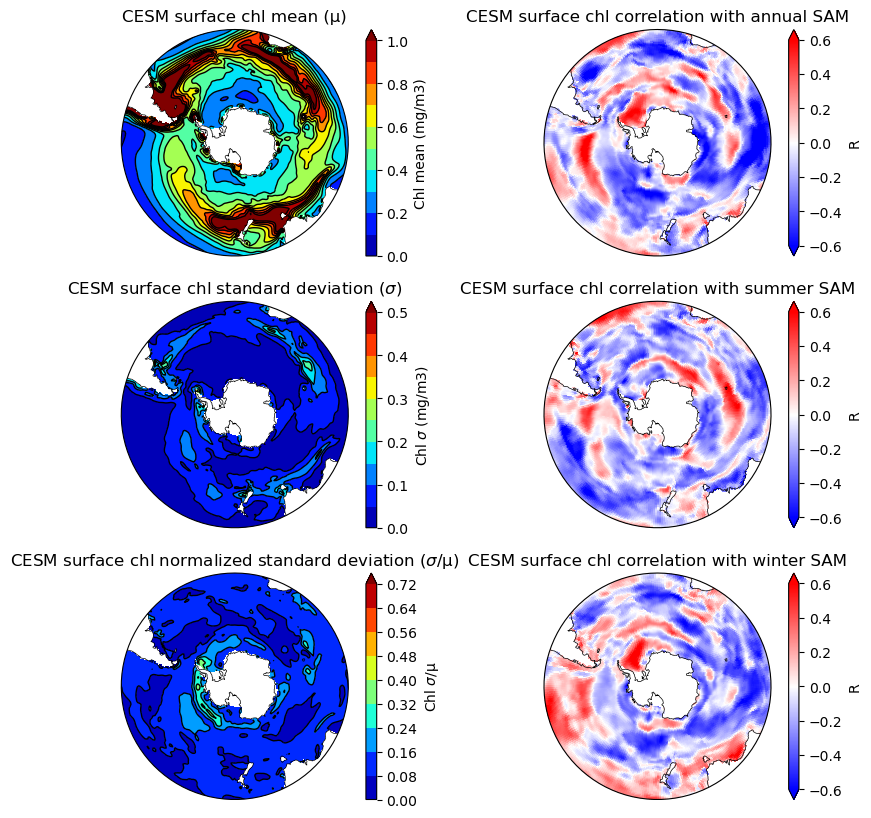

In [27]:
fig = plt.figure(figsize=(10,10))


#----------PLOT MEAN STATE---------------------------------------------------
lon, lat, field = adjust_pop_grid(lons, lats, mean_chl)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]
contour_specs1 = {'levels': np.arange(0,1.1,0.1)}

ax = fig.add_subplot(3,2,1, projection=ccrs.SouthPolarStereo())
ax.set_title('CESM surface chl mean (µ)')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

cf = ax.contourf(lon,lat,field,
                     transform=ccrs.PlateCarree(),cmap='jet',extend='max',**contour_specs1)
cs = ax.contour(lon,lat,field, colors='black',
                levels = contour_specs1['levels'],
                linewidths = 1,
                transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(cf, ax=ax,extend='max',label='Chl mean (mg/m3)')

#----------PLOT ST DEV ---------------------------------------------------
lon, lat, field = adjust_pop_grid(lons, lats, st_dev_chl)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]
contour_specs1 = {'levels': np.arange(0,0.55,0.05)}

ax = fig.add_subplot(3,2,3, projection=ccrs.SouthPolarStereo())
ax.set_title('CESM surface chl standard deviation (${\sigma}$)')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

cf = ax.contourf(lon,lat,field,
                     transform=ccrs.PlateCarree(),cmap='jet',extend='max',**contour_specs1)
cs = ax.contour(lon,lat,field, colors='black',
                levels = contour_specs1['levels'],
                linewidths = 1,
                transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(cf, ax=ax,extend='max',label='Chl ${\sigma}$ (mg/m3)')

#----------PLOT MEAN/ST DEV ---------------------------------------------------
lon, lat, field = adjust_pop_grid(lons, lats, norm_stdev_chl)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]
contour_specs1 = {'levels': np.arange(0,0.80,0.08)}

ax = fig.add_subplot(3,2,5, projection=ccrs.SouthPolarStereo())
ax.set_title('CESM surface chl normalized standard deviation (${\sigma}$/µ)')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

cf = ax.contourf(lon,lat,field,
                     transform=ccrs.PlateCarree(),cmap='jet',extend='max',**contour_specs1)
cs = ax.contour(lon,lat,field, colors='black',
                levels = contour_specs1['levels'],
                linewidths = 1,
                transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(cf, ax=ax,extend='max',label='Chl ${\sigma}$/µ')

#----------PLOT SAM annual correlation ---------------------------------------------------
lon, lat, field = adjust_pop_grid(lons, lats, chl_sam_ann_corr)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]

ax = fig.add_subplot(3,2,2, projection=ccrs.SouthPolarStereo())
ax.set_title('CESM surface chl correlation with annual SAM')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(lon, lat, 
                 field, vmin=-0.6, vmax=0.6, 
                 cmap='bwr',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')

#----------PLOT SAM summer correlation ---------------------------------------------------
lon, lat, field = adjust_pop_grid(lons, lats, chl_sam_sum_corr)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]

ax = fig.add_subplot(3,2,4, projection=ccrs.SouthPolarStereo())
ax.set_title('CESM surface chl correlation with summer SAM')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(lon, lat, 
                 field, vmin=-0.6, vmax=0.6, 
                 cmap='bwr',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')

#----------PLOT SAM winter correlation ---------------------------------------------------
lon, lat, field = adjust_pop_grid(lons, lats, chl_sam_win_corr)
sh = lat[:, 0] < 0
lon = lon[sh, :]
lat = lat[sh, :]
field = field[sh, :]

ax = fig.add_subplot(3,2,6, projection=ccrs.SouthPolarStereo())
ax.set_title('CESM surface chl correlation with winter SAM')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(lon, lat, 
                 field, vmin=-0.6, vmax=0.6, 
                 cmap='bwr',
                 transform=ccrs.PlateCarree())

ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')

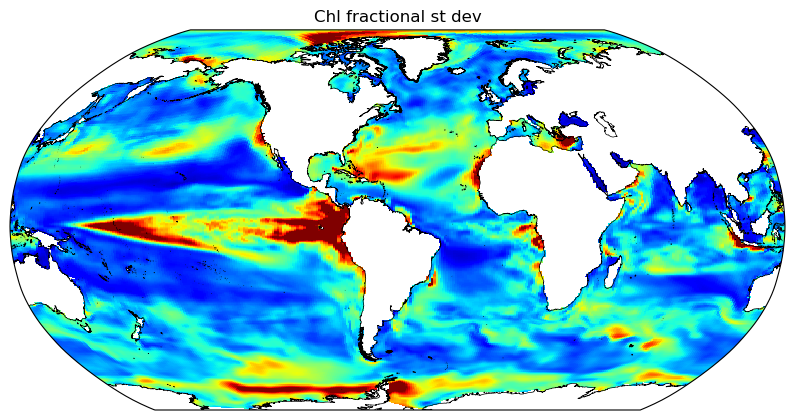

In [28]:
lon, lat, field = adjust_pop_grid(lons, lats, norm_stdev_chl)

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Chl fractional st dev', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=0.3,transform=ccrs.PlateCarree())

In [29]:
import matplotlib.colors as colors

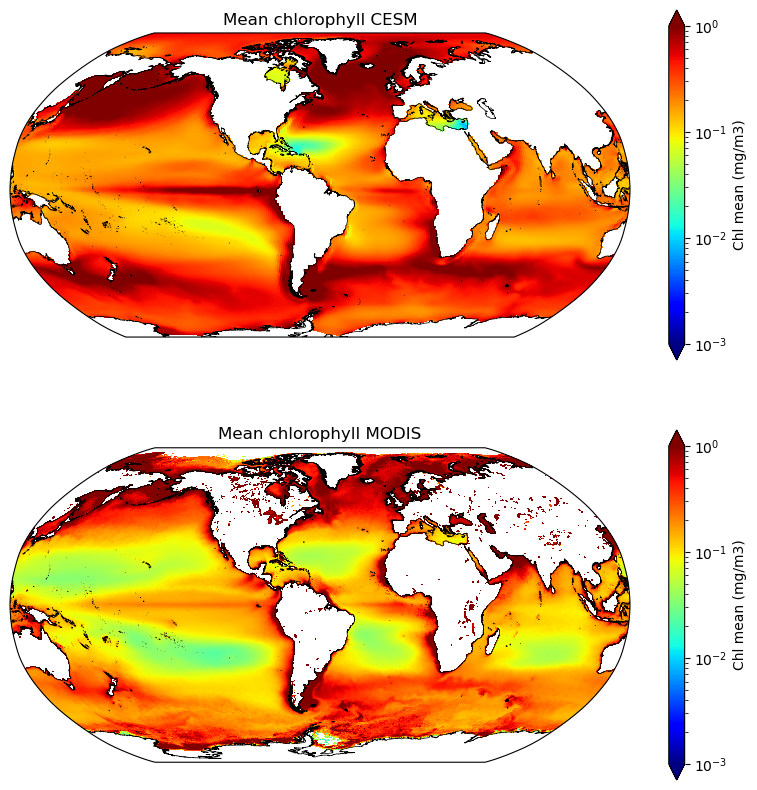

In [35]:
lon, lat, field = adjust_pop_grid(lons, lats, mean_chl)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Mean chlorophyll CESM', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, norm=colors.LogNorm(vmin=0.001,vmax=1), cmap='jet', transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Chl mean (mg/m3)')

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Mean chlorophyll MODIS', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(ds_sat.lon,ds_sat.lat,mean_satchl, norm=colors.LogNorm(vmin=0.001,vmax=1), cmap='jet', transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Chl mean (mg/m3)')

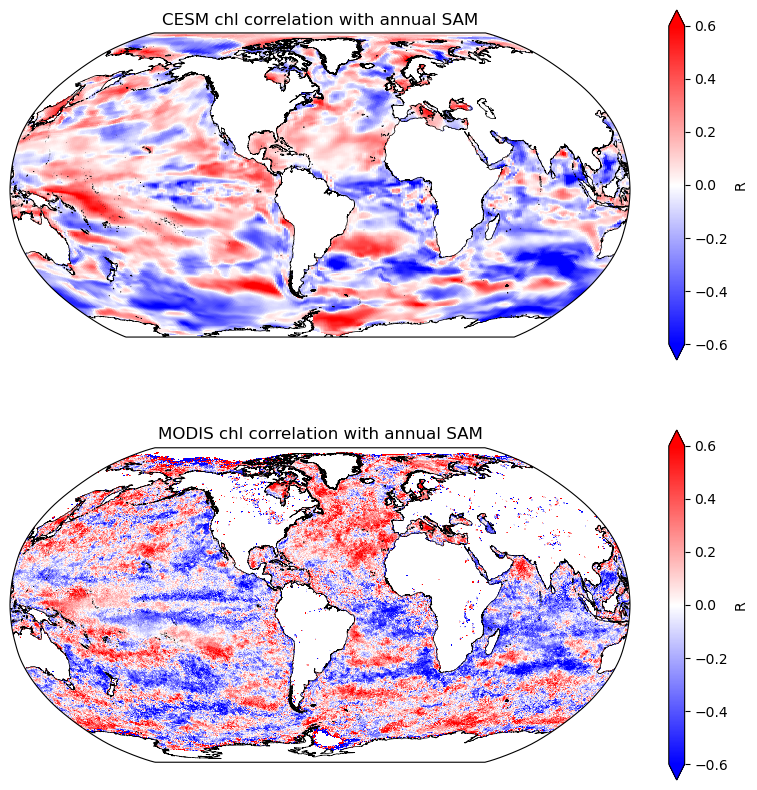

In [36]:
lon, lat, field = adjust_pop_grid(lons, lats, chl_sam_ann_corr)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM chl correlation with annual SAM', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, cmap='bwr',vmin=-0.6,vmax=0.6,transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('MODIS chl correlation with annual SAM', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(ds_sat.lon, ds_sat.lat, chlsat_sam_ann_corr, cmap='bwr',vmin=-0.6,vmax=0.6,transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='R')
